# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [4]:

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

from patsy import dmatrices

import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
# Carregando a base de gorjetas
tips = sns.load_dataset("tips")

#Criando a variável tip_pct - % da Gorjeta em Relação ao Valor Líquido da Conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável net_bill - Valor Líquido da Conta
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.columns

# Criando a matriz de design (matriz X) e a matriz y usando o Patsy
y, X = dmatrices('tip ~ sex + smoker + net_bill', data=tips, return_type='dataframe')

# Ajustando o modelo de Regressão
model = sm.OLS(y, X).fit()

# Verificando Sumário do Modelo para Analisar a Significancia Estatística das Variáveis
print(model.summary())

y, X = dmatrices('tip ~ net_bill', data=tips, return_type='dataframe')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.28
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           4.03e-21
Time:                        20:41:45   Log-Likelihood:                -375.19
No. Observations:                 244   AIC:                             758.4
Df Residuals:                     240   BIC:                             772.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2386      0.215      5.768

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

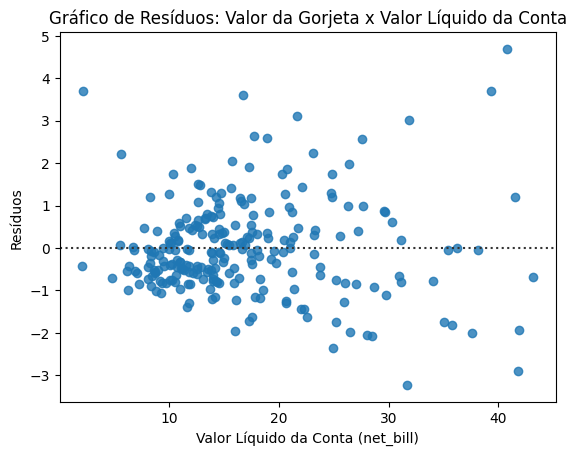

In [5]:

# Gráfico de Resíduos em Função de net_bill
sns.residplot(x='net_bill', y=model.resid, data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos: Valor da Gorjeta x Valor Líquido da Conta')
plt.show()

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [6]:
 #Transformando net_bill no log
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustando o Modelo de Regressão com net_bill Transformado no log
y_log, X_log = dmatrices('tip ~ log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

# Transformando net_bill em um Polinômio de 2º
tips['net_bill_squared'] = np.square(tips['net_bill'])

# Ajustando Modelo de Regressão com net_bill Transformado em um Polinômio
y_poly, X_poly = dmatrices('tip ~ net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

# Comparação
print("MODELO ORIGINAL:")
print(model.summary())
print("\nMODELO COM LOG (net_bill):")
print(model_log.summary())
print("\nMODELO COM net_bill e net_bill²")
print(model_poly.summary())

MODELO ORIGINAL:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.28
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           4.03e-21
Time:                        20:42:44   Log-Likelihood:                -375.19
No. Observations:                 244   AIC:                             758.4
Df Residuals:                     240   BIC:                             772.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2386     